### Preparing the data

In [6]:
import pandas as pd
df = pd.read_csv("../datasets/police_data/police.csv")
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [7]:
df.info()
# county_name all null, search_type mostly null (probably due to search_conducted=False), 
# many columns have missing values, # stop_date and stop_time should be converted to datetime, 
# violation and violation_raw seem to have similar values, # is_arrested should be a bool, 
# stop_duration would provide more info as a numerical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [8]:
df.shape

(91741, 15)

In [9]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [10]:
df["state"].value_counts()
# all values RI, no predictive value

RI    91741
Name: state, dtype: int64

In [11]:
df["driver_gender"].value_counts(normalize=True)

M    0.72527
F    0.27473
Name: driver_gender, dtype: float64

In [12]:
df["driver_race"].value_counts(normalize=True)

White       0.714961
Black       0.141959
Hispanic    0.112400
Asian       0.027618
Other       0.003062
Name: driver_race, dtype: float64

In [13]:
df[["violation", "violation_raw"]].value_counts()
# violation_raw contains more detail

violation            violation_raw                   
Speeding             Speeding                            48424
Moving violation     Other Traffic Violation             16224
Equipment            Equipment/Inspection Violation      10922
Registration/plates  Registration Violation               3703
Seat belt            Seatbelt Violation                   2856
Other                Special Detail/Directed Patrol       2467
                     Call for Service                     1392
                     Motorist Assist/Courtesy              205
                     Violation of City/Town Ordinance      181
                     APB                                    91
                     Suspicious Person                      56
                     Warrant                                18
dtype: int64

In [14]:
df["search_conducted"].value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [15]:
df["search_type"].value_counts()
# multiple values, could turn each into a bool

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [16]:
df[["stop_outcome", "is_arrested"]].value_counts()

stop_outcome      is_arrested
Citation          False          77092
Warning           False           5137
Arrest Driver     True            2735
No Action         False            625
N/D               False            607
Arrest Passenger  True             343
dtype: int64

In [17]:
df["stop_duration"].value_counts()

0-15 Min     69579
16-30 Min    13740
30+ Min       3220
Name: stop_duration, dtype: int64

In [18]:
df["drugs_related_stop"].value_counts(normalize=True)

False    0.990604
True     0.009396
Name: drugs_related_stop, dtype: float64

In [19]:
df["district"].value_counts(normalize=True)

Zone X4    0.264647
Zone K3    0.222420
Zone K2    0.200532
Zone X3    0.185446
Zone K1    0.094592
Zone X1    0.032363
Name: district, dtype: float64

In [20]:
df.drop(columns=["state", "county_name"], inplace=True)

In [21]:
df.dropna(subset=["driver_gender"], inplace=True)

In [22]:
df["is_arrested"] = df["is_arrested"].astype(bool)

In [23]:
df["stop_date"] = df["stop_date"].str.replace("/", "-")
combined = df["stop_date"].str.cat(df["stop_time"], sep=" ")
df["stop_datetime"] = pd.to_datetime(combined)
df.drop(columns=["stop_date", "stop_time"], inplace=True)
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [24]:
df.set_index("stop_datetime", inplace=True)

In [25]:
df.isnull().sum()

driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

### Data exploration

In [26]:
# Do male and female drivers commit different types of violations?
female = df[df["driver_gender"]=="F"]
male = df[df["driver_gender"]=="M"]

In [27]:
# Violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [28]:
# Violations by male drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [29]:
# Proportionally, a larger % of females are stopped for speeding than males. 
# This doesn't mean that females speed more often than males, 
# since we didn't take into account the number of stops or drivers.

In [30]:
# Are males or females more likely to get a ticket/arrested for speeding?
female_and_speeding = df[(df.driver_gender == 'F') & (df.violation == 'Speeding')]
male_and_speeding = df[(df.driver_gender == 'M') & (df.violation == 'Speeding')]

In [31]:
# Stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [32]:
# Stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [33]:
# The proportion of outcomes looks similar for males and females. 
# The data fails to show that gender has an impact on who gets a ticket for speeding.

In [34]:
# Does gender affect whether the veichle is checked?
df.groupby("driver_gender")["search_conducted"].mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [35]:
# Which district has a higher proportion of arrests?
df.groupby("district")["is_arrested"].mean().sort_values(ascending=False)

district
Zone X4    0.048038
Zone X3    0.034871
Zone K3    0.032311
Zone K2    0.030801
Zone K1    0.024349
Zone X1    0.023494
Name: is_arrested, dtype: float64

### Visual Analysis

In [52]:
# Does time of the day affect arrest rate?
df.is_arrested.mean()

0.0355690117407784

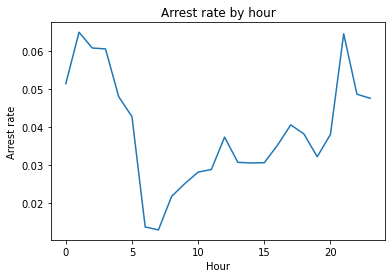

In [51]:
import matplotlib.pyplot as plt
is_arrested_hourly = df.groupby(df.index.hour).is_arrested.mean()
plt.plot(is_arrested_hourly)
plt.title("Arrest rate by hour")
plt.xlabel("Hour")
plt.ylabel("Arrest rate")
plt.show()

In [54]:
# Are drug related stops increasing?
df.drugs_related_stop.mean()

0.009961172228898956

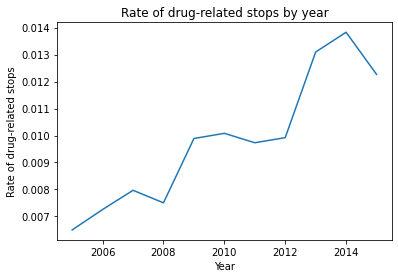

In [63]:
drugs_yearly = df.groupby(df.index.year).drugs_related_stop.mean()
plt.plot(drugs_yearly)
plt.xlabel("Year")
plt.ylabel("Rate of drug-related stops")
plt.title("Rate of drug-related stops by year")
plt.show()

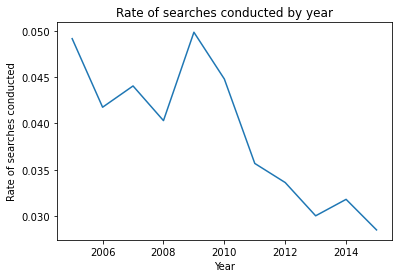

In [68]:
search_yearly = df.groupby(df.index.year).search_conducted.mean()
plt.plot(search_yearly)
plt.xlabel("Year")
plt.ylabel("Rate of searches conducted")
plt.title("Rate of searches conducted by year")
plt.show()

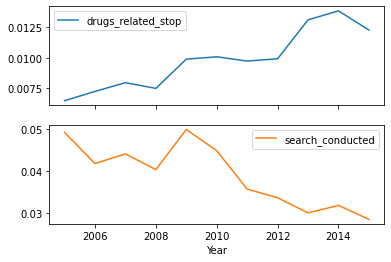

In [77]:
annual = pd.concat([drugs_yearly, search_yearly], axis=1)
annual.plot(subplots=True)
plt.xlabel("Year")
plt.show()

In [110]:
# Frequency tables!
pd.crosstab(df.driver_race, df.is_arrested)

is_arrested,False,True
driver_race,,
Asian,2343,46
Black,11516,769
Hispanic,9122,605
Other,263,2
White,60214,1656


In [118]:
# Are certain races more likely to be arrested?
race_arrest_table = pd.crosstab(df.driver_race, df.is_arrested)
race_arrest_table["Arrest_Rate"] = race_arrest_table[True]/(race_arrest_table[True]+race_arrest_table[False])
race_arrest_table

is_arrested,False,True,Arrest_Rate
driver_race,,,
Asian,2343,46,0.019255
Black,11516,769,0.062597
Hispanic,9122,605,0.062198
Other,263,2,0.007547
White,60214,1656,0.026766


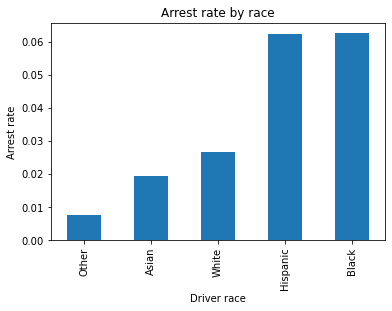

In [125]:
race_arrest_table.Arrest_Rate.sort_values().plot(kind="bar")
plt.xlabel("Driver race")
plt.ylabel("Arrest rate")
plt.title("Arrest rate by race")
plt.show()

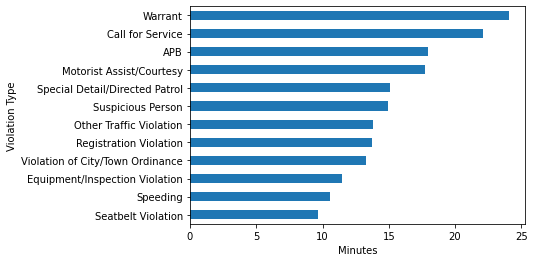

In [128]:
# How long are drivers detained after each type of violation?
mapping = {
    '0-15 Min':8,
    '16-30 Min':23,
    '30+ Min':45
}
df['stop_minutes'] = df.stop_duration.map(mapping)
stop_length = df.groupby("violation_raw").stop_minutes.mean()
stop_length.sort_values().plot(kind="barh")
plt.xlabel("Minutes")
plt.ylabel("Violation Type")
plt.show()